# Precificação de Imóveis
### Regressão Linear


# Dataset

Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Imports

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import numpy as np
import pickle

# Abertura e primeiras características dos dataset

In [83]:
dados = pd.read_csv('/content/drive/MyDrive/Projetos/Precificação de imóveis com Regressão Linear/data/HousePrices_HalfMil.csv')
dados.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [84]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


## Estatíticas descritivas

In [85]:
dados.describe().round(2)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.0,500000.00,500000.0,500000.0,500000.0,500000.0,500000.0,500000.0,500000.00
mean,124.93,2.00,2.00,3.00,0.33,0.33,0.33,0.5,2.00,0.5,0.5,0.5,0.5,0.5,0.5,42050.14
std,71.80,0.82,1.41,1.41,0.47,0.47,0.47,0.5,0.82,0.5,0.5,0.5,0.5,0.5,0.5,12110.24
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,7725.00
25%,63.00,1.00,1.00,2.00,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,33500.00
50%,125.00,2.00,2.00,3.00,0.00,0.00,0.00,0.0,2.00,0.0,1.0,1.0,0.0,1.0,1.0,41850.00
75%,187.00,3.00,3.00,4.00,1.00,1.00,1.00,1.0,3.00,1.0,1.0,1.0,1.0,1.0,1.0,50750.00
max,249.00,3.00,4.00,5.00,1.00,1.00,1.00,1.0,3.00,1.0,1.0,1.0,1.0,1.0,1.0,77975.00


## Coeficientes de correlação

In [86]:
dados.corr().round(4)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.0000,-0.0009,0.0004,-0.0004,0.0025,-0.0015,-0.0010,-0.0008,-0.0035,0.0005,-0.0001,0.0001,-0.0012,0.0006,0.0014,0.1477
Garage,-0.0009,1.0000,0.0013,-0.0036,0.0005,0.0018,-0.0024,-0.0009,0.0008,0.0015,0.0008,-0.0006,-0.0022,0.0011,-0.0007,0.1003
FirePlace,0.0004,0.0013,1.0000,0.0006,0.0010,-0.0009,-0.0000,0.0002,-0.0002,-0.0003,0.0013,0.0018,-0.0004,0.0013,0.0002,0.0891
Baths,-0.0004,-0.0036,0.0006,1.0000,0.0025,-0.0027,0.0002,-0.0009,-0.0009,-0.0008,0.0010,-0.0007,-0.0017,0.0022,0.0017,0.1451
White Marble,0.0025,0.0005,0.0010,0.0025,1.0000,-0.4989,-0.5007,0.0001,-0.0009,-0.0016,0.0006,-0.0006,-0.0004,-0.0019,0.0010,0.4482
Black Marble,-0.0015,0.0018,-0.0009,-0.0027,-0.4989,1.0000,-0.5004,-0.0004,-0.0003,0.0018,-0.0005,0.0001,0.0001,0.0007,0.0001,-0.0780
Indian Marble,-0.0010,-0.0024,-0.0000,0.0002,-0.5007,-0.5004,1.0000,0.0003,0.0012,-0.0002,-0.0000,0.0005,0.0003,0.0012,-0.0011,-0.3698
Floors,-0.0008,-0.0009,0.0002,-0.0009,0.0001,-0.0004,0.0003,1.0000,-0.0006,-0.0027,0.0001,0.0014,-0.0000,-0.0002,-0.0005,0.6195
City,-0.0035,0.0008,-0.0002,-0.0009,-0.0009,-0.0003,0.0012,-0.0006,1.0000,0.0005,0.0008,-0.0027,0.0008,0.0003,0.0012,0.2333
Solar,0.0005,0.0015,-0.0003,-0.0008,-0.0016,0.0018,-0.0002,-0.0027,0.0005,1.0000,0.0019,0.0002,-0.0008,-0.0005,-0.0043,0.0084


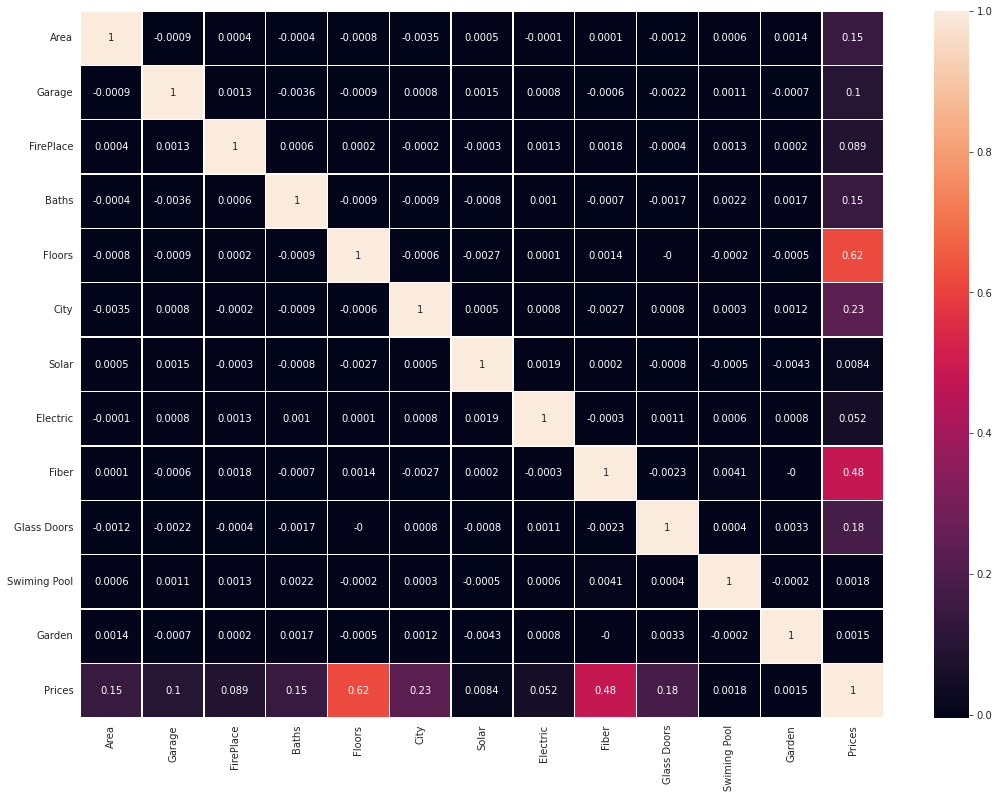

In [186]:
fig, ax = plt.subplots(figsize = (18,13))
sns.heatmap(dados.corr().round(4), annot = True, ax = ax, linewidths = 0.4)
plt.show()

* As presenças de acabamentos de mármore de diversas cores possuem uma forte correlação entre si, a de maior amplitude dentre todas as variáveis (-0.5).

* Todas as outras variáveis têm correlações entre si muito próximas a zero.

# Tratamentos sobre os dados

## Acabamentos de mármore

In [89]:
(dados['White Marble'] + dados['Black Marble'] + dados['Indian Marble']).unique()

array([1])

* Todos os imóveis têm exatamente um tipo de acabamento de mármore. Como a correlação entre as três variáveis é muito alta, optei por removê-las do dataset.

In [90]:
dados.drop(columns = ['White Marble', 'Black Marble', 'Indian Marble'], inplace = True)
dados.head()

,Area,Garage,FirePlace,Baths,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,2,1,0,0,1,1,1,52400


* Não considerei necessárias mais alterações no dataset antes das primeiras análises.

# Comportamentos da variável dependente (Prices)

In [91]:
# Estilização
sns.set_palette('cool')
sns.set_style('darkgrid')

## Boxplot preços dos imóveis

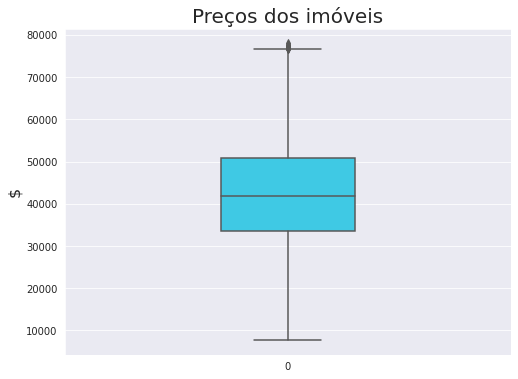

In [92]:
ax = sns.boxplot(data = dados['Prices'], width = 0.3)

ax.figure.set_size_inches(8,6)
ax.set_title('Preços dos imóveis', fontsize = 20)
ax.set_ylabel('$', fontsize = 16)

plt.show()

* O dataset possui alguns pontos discrepantes, mas não os considerei distorcidos o suficiente para trabalhar uma remoção de outliers.

## Distribuição de frequências da variável dependente (y)

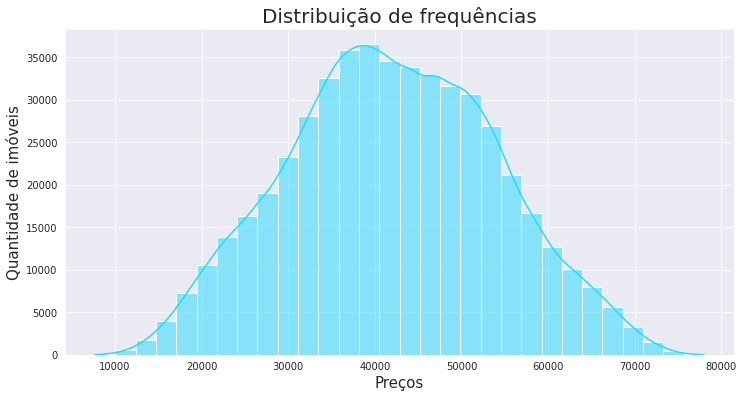

In [93]:
ax = sns.histplot(data = dados['Prices'], kde = True, bins = 30)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências', fontsize = 20)
ax.set_xlabel('Preços', fontsize = 15)
ax.set_ylabel('Quantidade de imóveis', fontsize = 15)

plt.show()

* A variável dependente (Prices) tem uma distribuição de frequências mais próxima da simétrica e tende a seguir uma distribuição normal.

# Investigando a variável dependente (y) juntamente com outras características (X)

### Rank de correlações

In [94]:
dados.corr().round(4)['Prices'].sort_values()

Garden          0.0015
Swiming Pool    0.0018
Solar           0.0084
Electric        0.0524
FirePlace       0.0891
Garage          0.1003
Baths           0.1451
Area            0.1477
Glass Doors     0.1820
City            0.2333
Fiber           0.4846
Floors          0.6195
Prices          1.0000
Name: Prices, dtype: float64

## Prices x Area

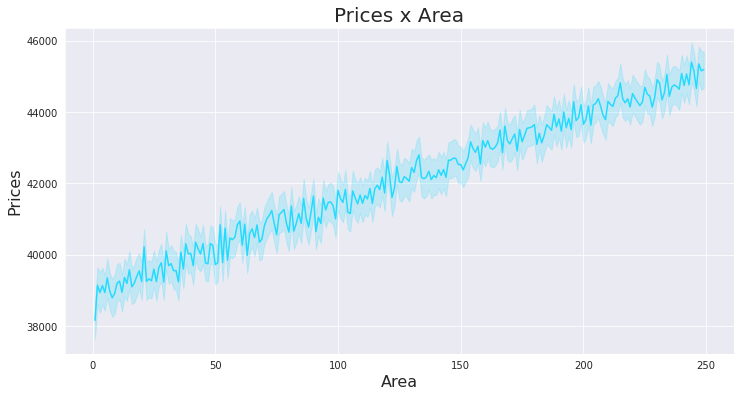

In [95]:
ax = sns.lineplot(data = dados, x = 'Area', y = 'Prices')

ax.figure.set_size_inches(12,6)
ax.set_title('Prices x Area', fontsize = 20)
ax.set_ylabel('Prices', fontsize = 16)
ax.set_xlabel('Area', fontsize = 16)

plt.show()

* O valor da correlação entre Prices e Area é de **+0.15**.

* Os preços dos imóveis aumentam de acordo com o aumento da área.

## Prices x Garage

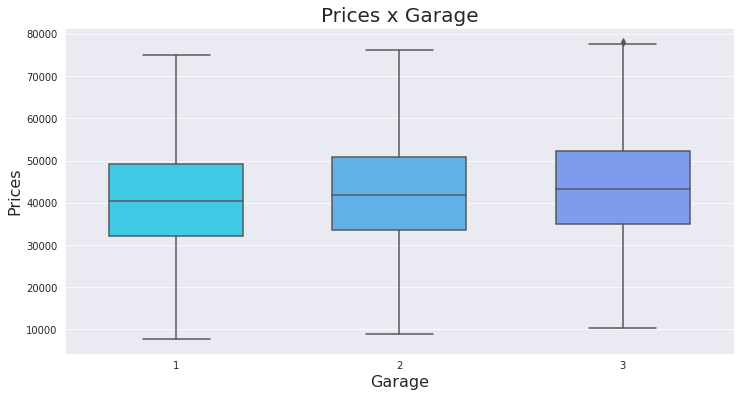

In [96]:
ax = sns.boxplot(data = dados, x = 'Garage', y = 'Prices', width = 0.6)

ax.figure.set_size_inches(12,6)
ax.set_title('Prices x Garage', fontsize = 20)
ax.set_ylabel('Prices', fontsize = 16)
ax.set_xlabel('Garage', fontsize = 16)

plt.show()

* O valor da correlação entre Prices e Garage é de **+0.1**, positiva e visível via boxplot.

* Os preços dos imóveis aumentam de acordo com o aumento no número de vagas de garagem.

## Prices x FirePlace

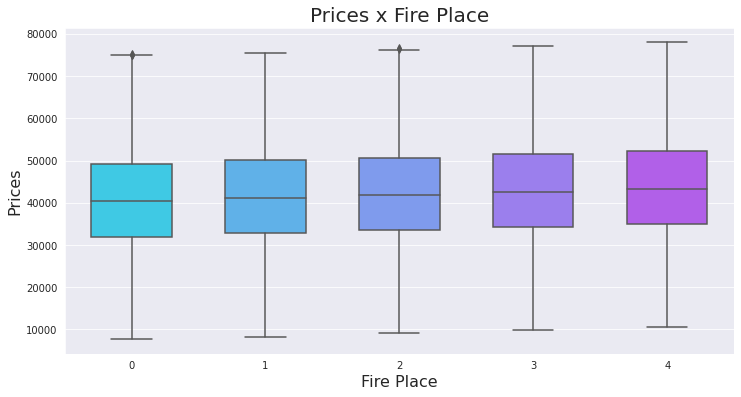

In [97]:
ax = sns.boxplot(data = dados, x = 'FirePlace', y = 'Prices', width = 0.6)

ax.figure.set_size_inches(12,6)
ax.set_title('Prices x Fire Place', fontsize = 20)
ax.set_ylabel('Prices', fontsize = 16)
ax.set_xlabel('Fire Place', fontsize = 16)

plt.show()

* O valor da correlação entre Prices e FirePlace é de **+0.089**.

* Os preços dos imóveis aumentam de acordo com a quantidade de lareiras, de forma diretamente proporcional.

## Prices x Baths

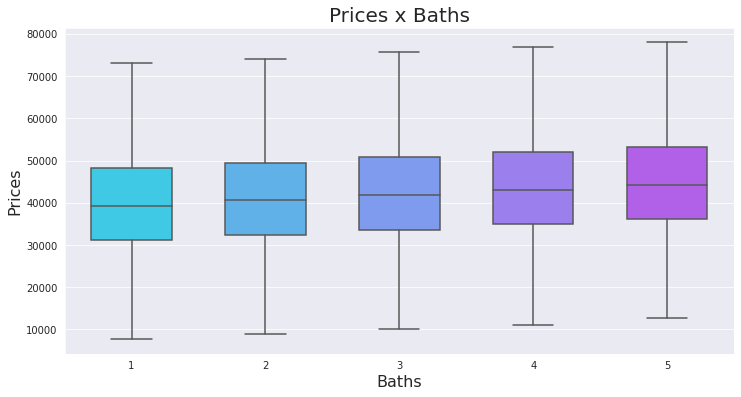

In [98]:
ax = sns.boxplot(data = dados, x = 'Baths', y = 'Prices', width = 0.6)

ax.figure.set_size_inches(12,6)
ax.set_title('Prices x Baths', fontsize = 20)
ax.set_ylabel('Prices', fontsize = 16)
ax.set_xlabel('Baths', fontsize = 16)

plt.show()

* O valor da correlação entre Prices e Baths é de **+0.15**.

* Os preços dos imóveis aumentam de acordo com a quantidade de banheiros.

## Prices x Floors

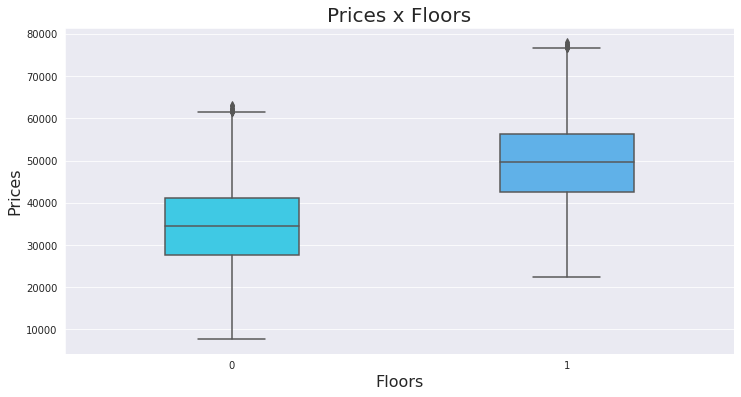

In [99]:
ax = sns.boxplot(data = dados, x = 'Floors', y = 'Prices', width = 0.4)

ax.figure.set_size_inches(12,6)
ax.set_title('Prices x Floors', fontsize = 20)
ax.set_ylabel('Prices', fontsize = 16)
ax.set_xlabel('Floors', fontsize = 16)

plt.show()

* O valor da correlação entre Prices e Floors é de **+0.62**, a maior correlação dentre as variáveis explicativas.

* Os preços dos imóveis aumentam de acordo com a quantidade de andares.

## Prices x City

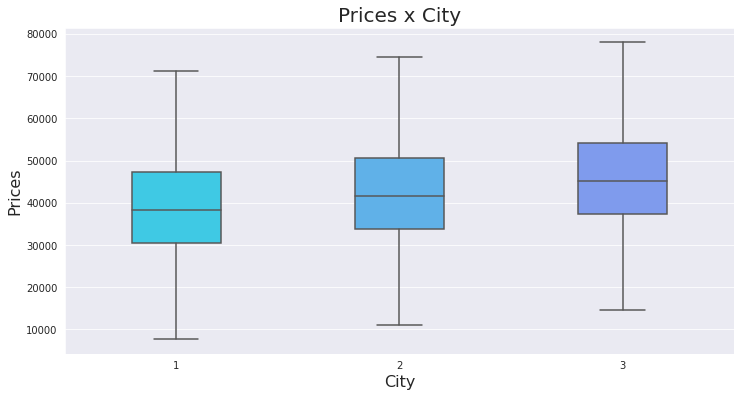

In [100]:
ax = sns.boxplot(data = dados, x = 'City', y = 'Prices', width = 0.4)

ax.figure.set_size_inches(12,6)
ax.set_title('Prices x City', fontsize = 20)
ax.set_ylabel('Prices', fontsize = 16)
ax.set_xlabel('City', fontsize = 16)

plt.show()

* O valor da correlação entre Prices e Floors é de **+0.23**.

* Os preços dos imóveis são maiores na cidade 3 e menores na cidade 1.

## Prices x Solar

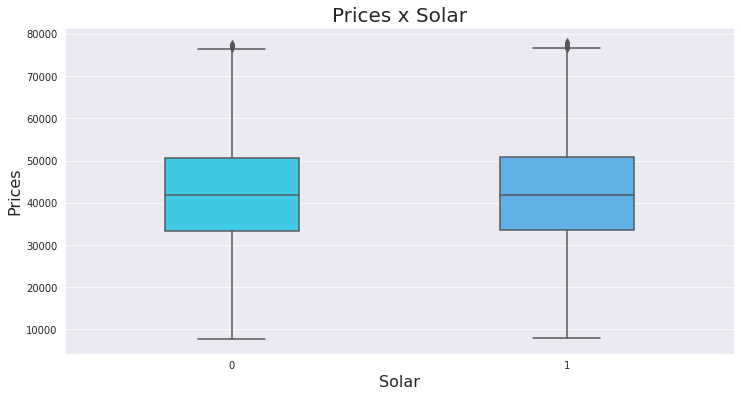

In [101]:
ax = sns.boxplot(data = dados, x = 'Solar', y = 'Prices', width = 0.4)

ax.figure.set_size_inches(12,6)
ax.set_title('Prices x Solar', fontsize = 20)
ax.set_ylabel('Prices', fontsize = 16)
ax.set_xlabel('Solar', fontsize = 16)

plt.show()

* O valor da correlação entre Prices e Solar é de **+0.0084**.

* Os preços dos imóveis são maiores em imóveis com sistema solar.

## Prices x Electric

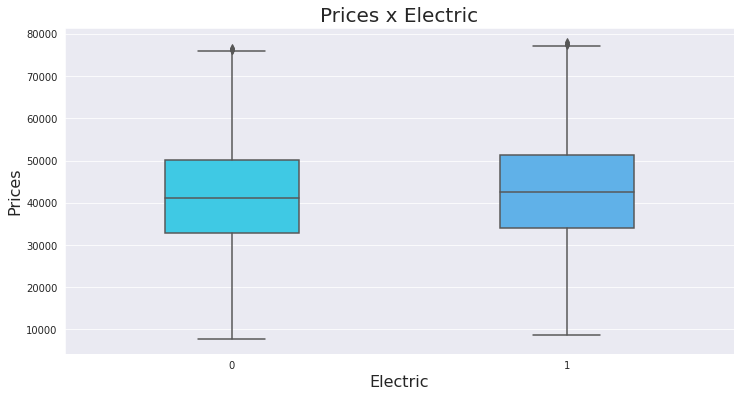

In [102]:
ax = sns.boxplot(data = dados, x = 'Electric', y = 'Prices', width = 0.4)

ax.figure.set_size_inches(12,6)
ax.set_title('Prices x Electric', fontsize = 20)
ax.set_ylabel('Prices', fontsize = 16)
ax.set_xlabel('Electric', fontsize = 16)

plt.show()

* O valor da correlação entre Prices e Electric é de **+0.052**.

* Os preços dos imóveis são maiores em imóveis com instalação elétrica.

## Prices x Fiber

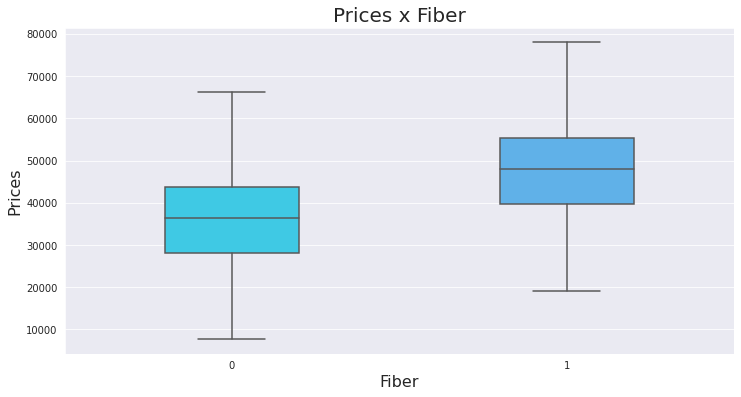

In [103]:
ax = sns.boxplot(data = dados, x = 'Fiber', y = 'Prices', width = 0.4)

ax.figure.set_size_inches(12,6)
ax.set_title('Prices x Fiber', fontsize = 20)
ax.set_ylabel('Prices', fontsize = 16)
ax.set_xlabel('Fiber', fontsize = 16)

plt.show()

* O valor da correlação entre Prices e Fiber é de **+0.48**, a segunda maior dentre as variáveis explicativas.

* Os preços dos imóveis são maiores em imóveis com instalação de fibra.

## Prices x Glass Doors

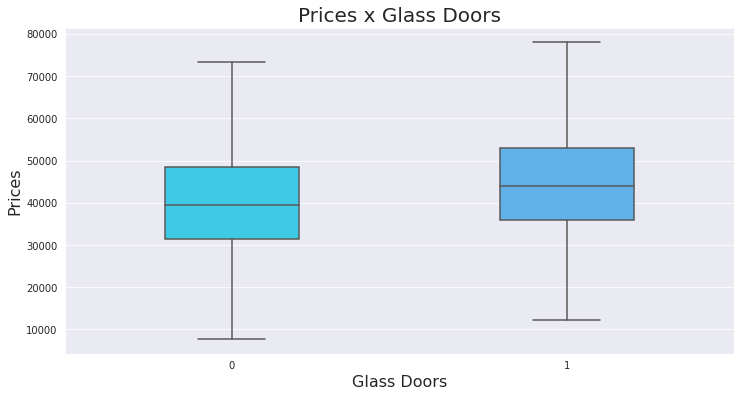

In [104]:
ax = sns.boxplot(data = dados, x = 'Glass Doors', y = 'Prices', width = 0.4)

ax.figure.set_size_inches(12,6)
ax.set_title('Prices x Glass Doors', fontsize = 20)
ax.set_ylabel('Prices', fontsize = 16)
ax.set_xlabel('Glass Doors', fontsize = 16)

plt.show()

* O valor da correlação entre Prices e Glass Doors é de **+0.18**.

* Os preços dos imóveis são maiores quando há presença de portas de vidro.

## Prices x Swiming Pool

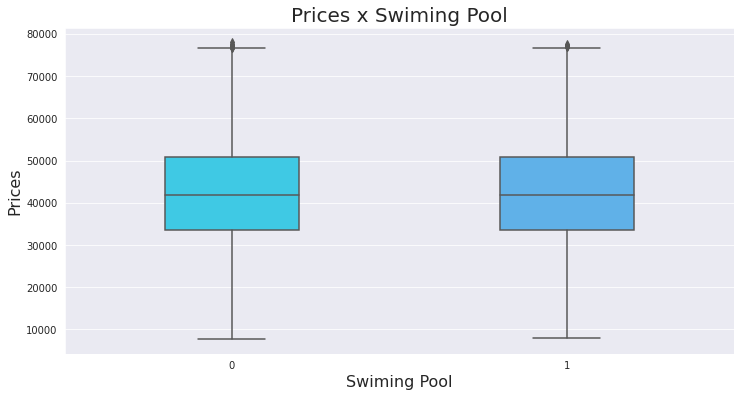

In [105]:
ax = sns.boxplot(data = dados, x = 'Swiming Pool', y = 'Prices', width = 0.4)

ax.figure.set_size_inches(12,6)
ax.set_title('Prices x Swiming Pool', fontsize = 20)
ax.set_ylabel('Prices', fontsize = 16)
ax.set_xlabel('Swiming Pool', fontsize = 16)

plt.show()

* O valor da correlação entre Prices e Swiming Pool é de **+0.0018**, a segunda menor dentre as variáveis explicativas.

* Imóveis com piscina contribuem com o aumento do preço do imóvel, apesar da contribuição ser baixa.

## Prices x Garden

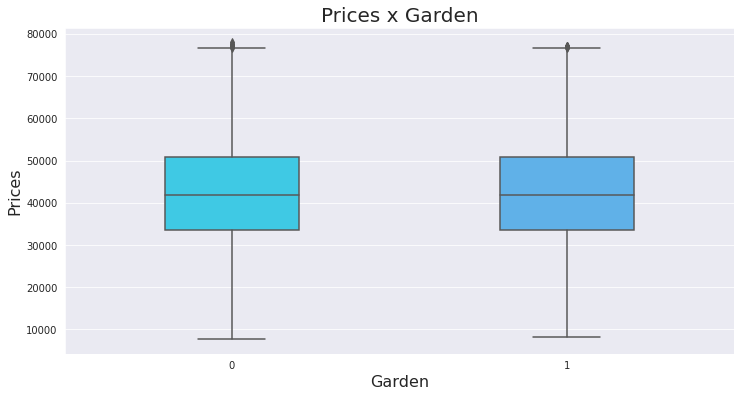

In [106]:
ax = sns.boxplot(data = dados, x = 'Garden', y = 'Prices', width = 0.4)

ax.figure.set_size_inches(12,6)
ax.set_title('Prices x Garden', fontsize = 20)
ax.set_ylabel('Prices', fontsize = 16)
ax.set_xlabel('Garden', fontsize = 16)

plt.show()

* O valor da correlação entre Prices e Garden é de **+0.0015**, a menor dentre as variáveis explicativas.

* Imóveis com jardim contribuem com o aumento do preço do imóvel, apesar da contribuição ser a mais baixa.

# Dispersão entre as variáveis do dataset

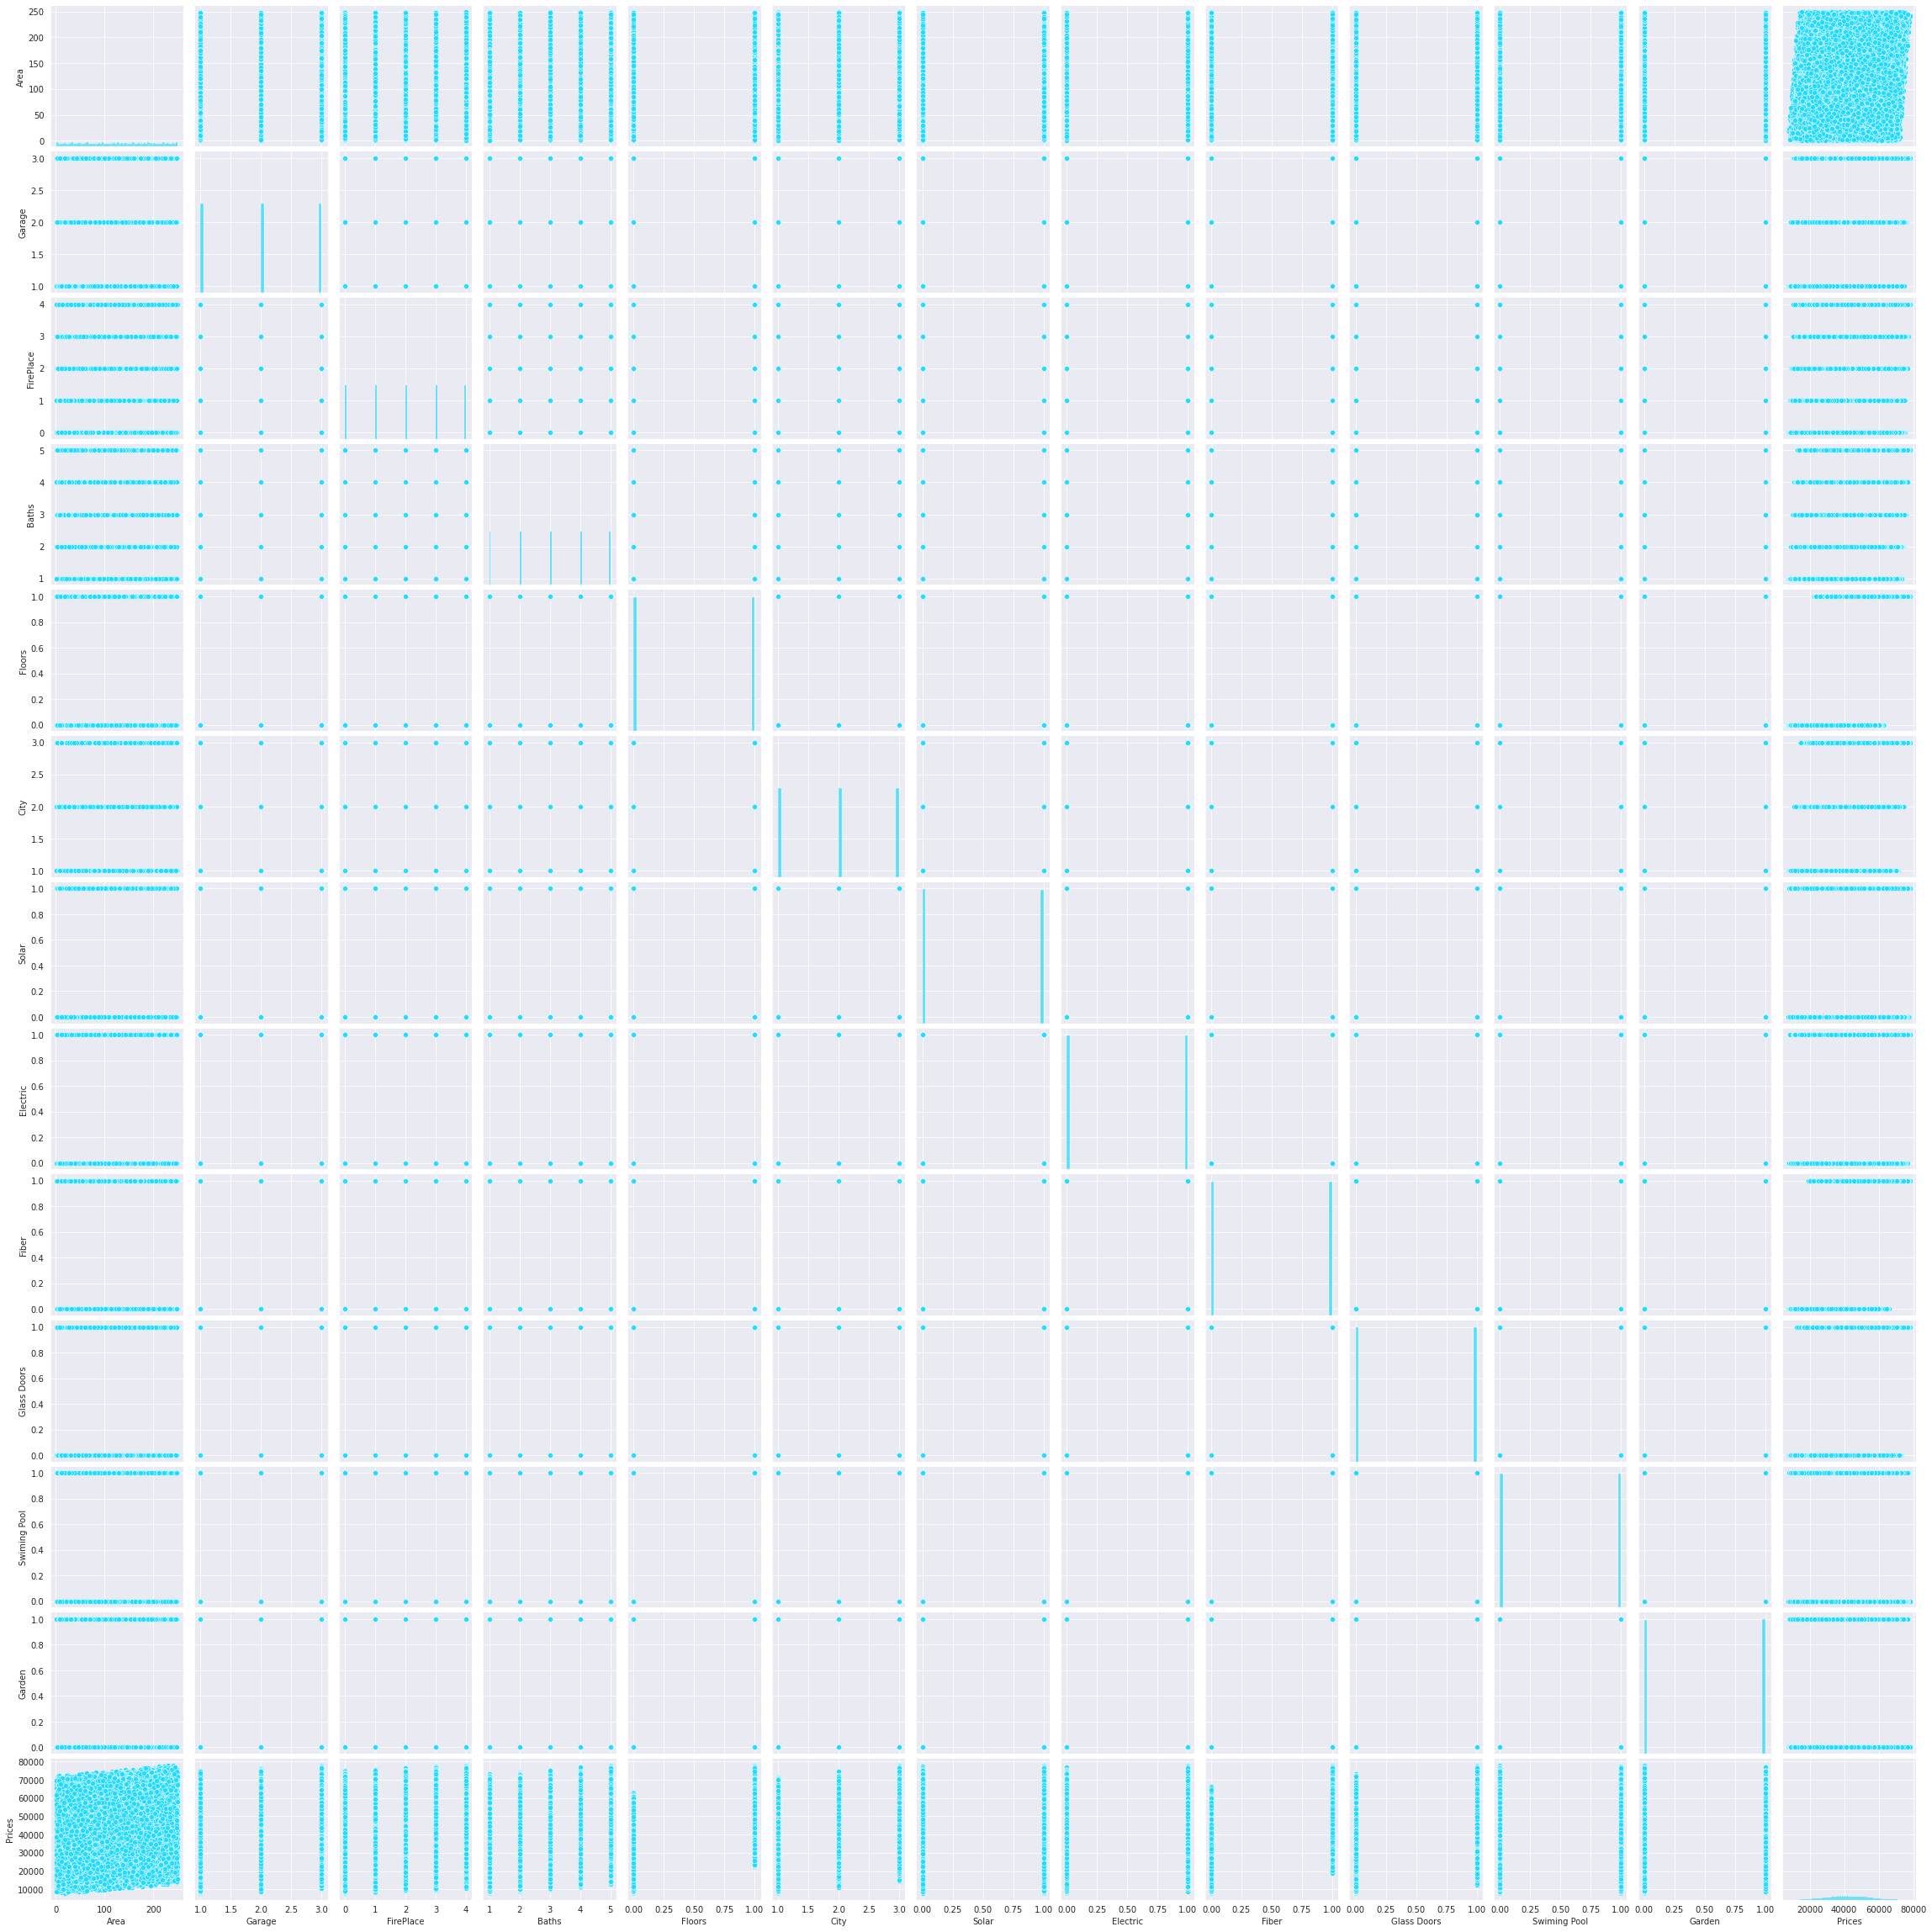

In [185]:
ax = sns.pairplot(dados)

## Somente correlações com Preço

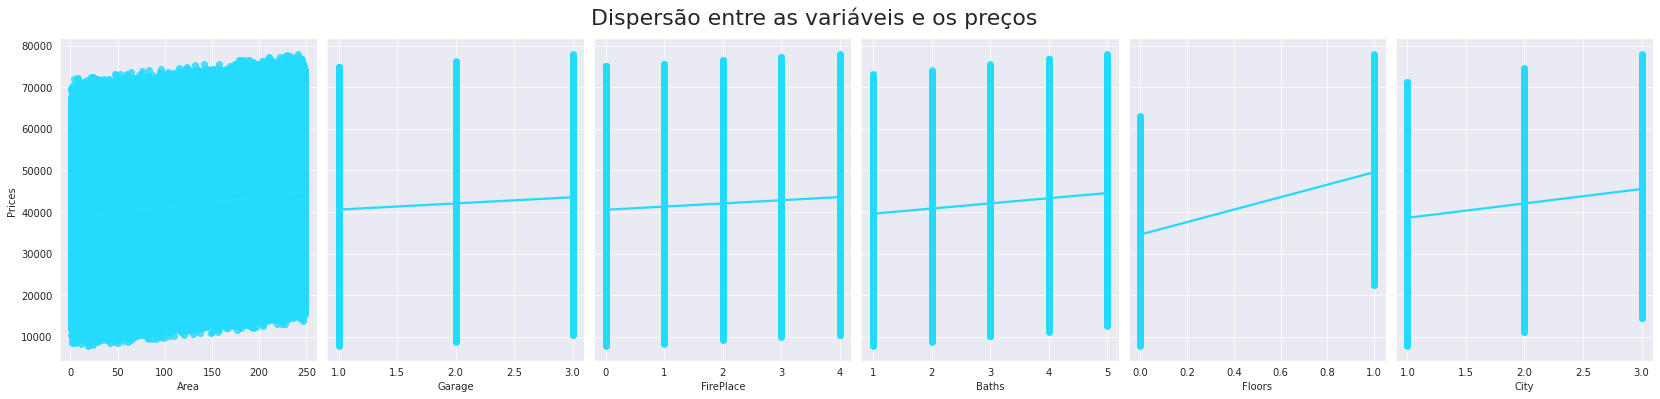

In [108]:
ax = sns.pairplot(dados, y_vars = 'Prices', x_vars = ['Area', 'Garage', 'FirePlace', 'Baths', 'Floors', 'City'], kind = 'reg')
ax.figure.set_size_inches(24,6)
ax.fig.suptitle('Dispersão entre as variáveis e os preços', fontsize = 22, y = 1.03)
plt.show()

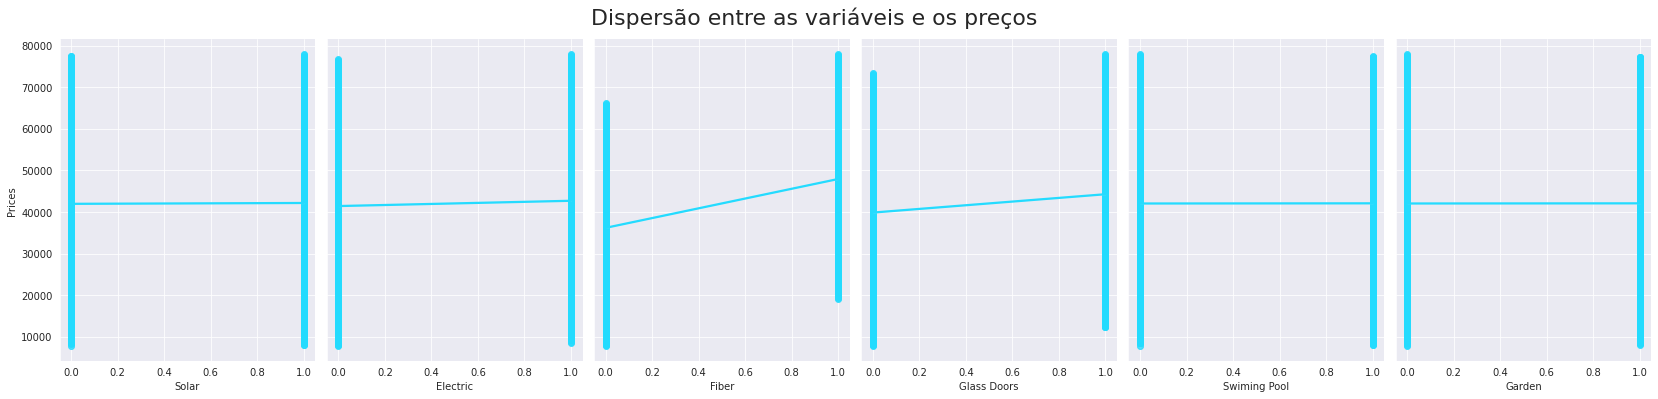

In [109]:
ax = sns.pairplot(dados, y_vars = 'Prices', x_vars = ['Solar', 'Electric', 'Fiber', 'Glass Doors', 'Swiming Pool', 'Garden'], kind = 'reg')
ax.figure.set_size_inches(24,6)
ax.fig.suptitle('Dispersão entre as variáveis e os preços', fontsize = 22, y = 1.03)
plt.show()

# 1º Modelo de Regressão Linear

Todas as variáveis explicativas do dataset, excluindo os diferentes tipos de mármore.

### Variáveis

In [123]:
# Variável dependente (y)
y_1 = dados['Prices']

# Variáveis explicativas (X)
X_1 = dados[['Area', 'Garage', 'FirePlace', 'Baths', 'Floors', 'City', 'Solar', 'Electric', 'Fiber', 'Glass Doors', 'Swiming Pool', 'Garden']]

# Datasets de treino e teste
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=2811)

### Treinamento

In [124]:
modelo_1 = LinearRegression()
modelo_1.fit(X1_train, y1_train)

LinearRegression()

### Previsões sobre o conjunto de teste

In [125]:
y1_previsto = modelo_1.predict(X1_test)

## Coeficiente de Determinação (R²)

### Sobre o conjunto de treino

In [126]:
r2_1_train = modelo_1.score(X1_train, y1_train)
print(f"R² = {r2_1_train:.2f}")

R² = 0.77


### Sobre o conjunto de teste

In [127]:
r2_1_previsto = metrics.r2_score(y1_test, y1_previsto)
print(f"R² = {r2_1_previsto:.2f}")

R² = 0.77


## Métricas de Regressão

In [128]:
# Erro Quadrático Médio
EQM_1 = metrics.mean_squared_error(y1_test, y1_previsto)
# Raiz do Erro Quadrático Médio
REQM_1 = np.sqrt(EQM_1)
# Coeficiente de Determinação
R2_1 = metrics.r2_score(y1_test, y1_previsto)

pd.DataFrame(data = [EQM_1.round(2), REQM_1.round(2), R2_1.round(2)], index = ['EQM', 'REQM', 'R²'], columns = ['Métricas'])

,Métricas
EQM,33564873.11
REQM,5793.52
R²,0.77


# Gráfico de dispersão entre valor estimado e valor real

In [129]:
y1_previsto_train = modelo_1.predict(X1_train)

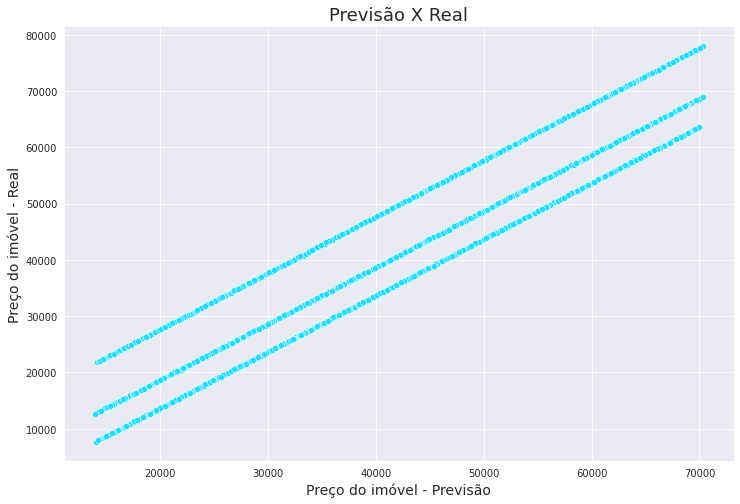

In [130]:
ax = sns.scatterplot(x = y1_previsto_train, y = y1_train)
ax.figure.set_size_inches(12, 8)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Preço do imóvel - Previsão', fontsize=14)
ax.set_ylabel('Preço do imóvel - Real', fontsize=14)
plt.show()

* Não há variações visíveis à medida que os preços aumentam, isso pode indicar que o modelo não sofre perda ou ganho de rendimento em algum intervalo.

# 2º Modelo de Regressão Linear

Todas as variáveis explicativas do dataset, juntamente com as variáveis excluídas do 1º modelo.

* Como é um conjunto gerado computacionalmente para fins de prática e fixação de conceitos, é esperado que o uso direto de todas as variáveis explicativas gere previsões com 100% de acerto, o que não seria observado em uma situação com dados reais.

* Os estudos sobre este segundo modelo mostram o que seria desejável em qualquer dataset, como se comportariam as métricas de regressão e o gráfico de dispersão em uma predição 100% correta.

### Variáveis

In [160]:
dados_original = pd.read_csv('/content/drive/MyDrive/Projetos/Precificação de imóveis com Regressão Linear/data/HousePrices_HalfMil.csv')
dados_original.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [187]:
# Variável dependente (y)
y_2 = dados_original['Prices']

# Variáveis explicativas (X)
X_2 = dados_original[['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble', 'Indian Marble', 'Floors', 'City', 'Solar', 'Electric', 
                      'Fiber', 'Glass Doors', 'Swiming Pool', 'Garden']]

# Datasets de treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=2811)

### Treinamento

In [163]:
modelo_2 = LinearRegression()
modelo_2.fit(X2_train, y2_train)

LinearRegression()

### Previsões sobre o conjunto de teste

In [164]:
y2_previsto = modelo_2.predict(X2_test)

## Coeficiente de Determinação (R²)

### Sobre o conjunto de treino

In [165]:
r2_2_train = modelo_2.score(X2_train, y2_train)
print(f"R² = {r2_2_train:.2f}")

R² = 1.00


### Sobre o conjunto de teste

In [166]:
r2_2_previsto = metrics.r2_score(y2_test, y2_previsto)
print(f"R² = {r2_2_previsto:.2f}")

R² = 1.00


O R² atingiu o maior valor possível, indicando que todos os preços previstos foram compatíveis com os valores esperados no conjunto de teste.

## Métricas de regressão

In [167]:
# Erro Quadrático Médio
EQM_2 = metrics.mean_squared_error(y2_test, y2_previsto)
# Raiz do Erro Quadrático Médio
REQM_2 = np.sqrt(EQM_2)
# Coeficiente de Determinação
R2_2 = metrics.r2_score(y2_test, y2_previsto)

pd.DataFrame(data = [EQM_2.round(2), REQM_2.round(2), R2_2.round(2)], index = ['EQM', 'REQM', 'R²'], columns = ['Métricas'])

,Métricas
EQM,0.0
REQM,0.0
R²,1.0


O Erro Quadrático Médio e a Raiz do Erro Quadrático Médio com valor zero indicam que não houve nenhum erro nas previsões do modelo.

# Gráfico de dispersão entre valor estimado e valor real (2º modelo)

In [168]:
y2_previsto_train = modelo_2.predict(X2_train)

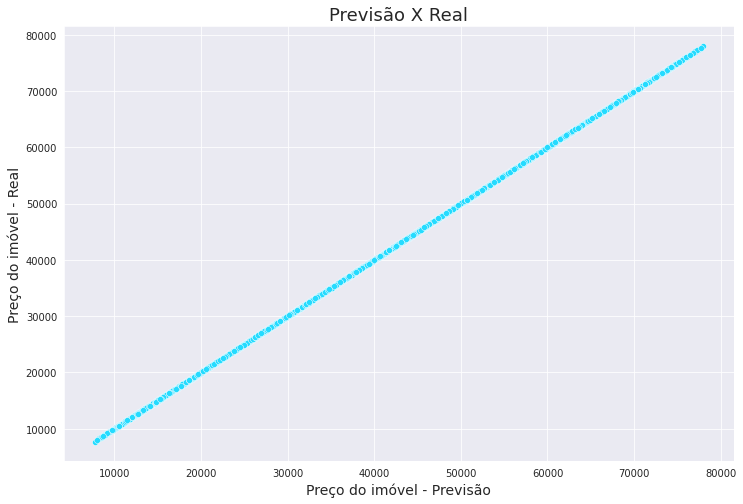

In [169]:
ax = sns.scatterplot(x = y2_previsto_train, y = y2_train)
ax.figure.set_size_inches(12, 8)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Preço do imóvel - Previsão', fontsize=14)
ax.set_ylabel('Preço do imóvel - Real', fontsize=14)
plt.show()

O gráfico de dispresão acima mostra que todos os valores previstos são idênticos aos valores reais.

# Salvando modelo

In [170]:
output = open('modelo_precos_imoveis', 'wb')
pickle.dump(modelo_2, output)
output.close()

# Abrindo um modelo

In [171]:
modelo = open('modelo_precos_imoveis','rb')
linear_model_new = pickle.load(modelo)
modelo.close()

# Consultas pontuais com simulador interativo

In [172]:
dados_original.columns

Index(['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble',
       'Indian Marble', 'Floors', 'City', 'Solar', 'Electric', 'Fiber',
       'Glass Doors', 'Swiming Pool', 'Garden', 'Prices'],
      dtype='object')

In [173]:
len(dados_original.columns)

16

In [188]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Criando os controles do formulário
area = widgets.Text(description="Area")
garage = widgets.Text(description="Garage")
fire_place = widgets.Text(description="FirePlace")
baths = widgets.Text(description="Baths")
white_marble = widgets.Text(description="White Marble")
black_marble = widgets.Text(description="Black Marble")
indian_marble = widgets.Text(description="Indian Marble")
floors = widgets.Text(description="Floors")
city = widgets.Text(description="City")
solar = widgets.Text(description="Solar")
electric = widgets.Text(description="Electric")
fiber = widgets.Text(description="Fiber")
glass_doors = widgets.Text(description="Glass Doors")
swiming_pool = widgets.Text(description="Swiming Pool")
garden = widgets.Text(description="Garden")

botao = widgets.Button(description="Simular")

# Posicionando os controles
left = VBox([area, garage, fire_place, baths, white_marble])
mid = VBox([black_marble, indian_marble, floors, city, solar])
right = VBox([electric, fiber, glass_doors, swiming_pool, garden])
inputs = HBox([left, mid, right])

# Função de simulação
def simulador(sender):

  area_entrada = float(area.value if area.value else 0)
  garage_entrada = float(garage.value if garage.value else 0)
  fire_place_entrada = float(fire_place.value if fire_place.value else 0)
  baths_entrada = float(baths.value if baths.value else 0)
  floors_entrada = float(floors.value if floors.value else 0)

  white_marble_entrada = float(white_marble.value if white_marble.value else 0)
  black_marble_entrada = float(black_marble.value if black_marble.value else 0)
  indian_marble_entrada = float(indian_marble.value if indian_marble.value else 0)
  city_entrada = float(city.value if city.value else 0)
  solar_entrada = float(solar.value if solar.value else 0)

  electric_entrada = float(electric.value if electric.value else 0)
  fiber_entrada = float(fiber.value if fiber.value else 0)
  glass_doors_entrada = float(glass_doors.value if glass_doors.value else 0)
  swiming_pool_entrada = float(swiming_pool.value if swiming_pool.value else 0)
  garden_entrada = float(garden.value if garden.value else 0)

  entrada = pd.DataFrame(data = [[area_entrada, garage_entrada, fire_place_entrada, baths_entrada, white_marble_entrada, black_marble_entrada, 
                                  indian_marble_entrada, floors_entrada, city_entrada, solar_entrada, electric_entrada, fiber_entrada, 
                                  glass_doors_entrada, swiming_pool_entrada, garden_entrada]], 
                         columns = ['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble', 'Black Marble', 'Indian Marble', 'Floors', 'City',
                                    'Solar', 'Electric', 'Fiber', 'Glass Doors', 'Swiming Pool', 'Garden'])
  print('{0:.2f} $'.format(linear_model_new.predict(entrada)[0]))

# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador) 

In [184]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())

54125.00 $


In [180]:
dados_original.sample(1)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
280418,247,3,0,2,0,1,0,1,1,1,0,1,1,1,0,54125
